# Reading the Data
Dataset yang digunakan merupakan dataset supermarket sales yang didownload dari Kaggle (https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales) yang kemudian diupload ke dalam google drive pribadi.

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
#membuat dataframe menjadi tabel yang lebih interaktif (dapat melihat keseluruhan data (kalau dataframe biasa hanya akan overviewnya titik titik, kemudian ada fitur filter,sort,dll)
from google.colab import data_table 
data_table.enable_dataframe_formatter() 

In [15]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Kecerdasan Digital 2022: Data Science/Dataset/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
# checking data null
df.isna().sum()

# # menghapus nilai na
# df = df.dropna() # inisialiasi df baru dengan df yang sudah didrop nilai na(null)nya, kalau tidak diinisialisasi ulang -> dfnya tetap akan sama dengan nilai df di awal tadi
# df.dropna(inplace=True) #cara lain selain inisialisasi ulang variabel df -> dengan menambah parameter "inplace=True" untuk mereplace nilai df karena default dari inplace=False

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [25]:
#checking data type
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Karena column Date masih berupa object/string, kita harus mengubahnya menjadi type datetime

In [26]:
# mengubah type data Date menjadi format tanggal (datetime)
df["Date"] = pd.to_datetime(df["Date"])

In [27]:
# recheck data types
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [29]:
df.head()
# format tanggal sudah berubah menjadi format tanggal yang berbeda dan lebih computer-friendly(yyyy-mm-dd)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
# melakukan analisis deskriptif untuk melihat summary data
df.describe() #melakukan processing statistika terhadap data yang berupa angka

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Question: Apa perbedaan pengeluaran dari pria dan wanita pada jenis produk tertentu?

In [33]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [34]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [38]:
# pivoting/grouping data
df.groupby(['Product line', 'Gender']).mean() #mengkategorikan data berdasarkan urutan Product line terlebih dahulu, kemudian baru Gender (bisa juga dibalik)

Unit price  Quantity     Tax 5%       Total  \
Product line           Gender                                                
Electronic accessories Female   52.051548  5.809524  15.363958  322.643125   
                       Male     55.016744  5.616279  15.080570  316.691965   
Fashion accessories    Female   55.526979  5.520833  15.097917  317.056250   
                       Male     59.058049  4.536585  13.860915  291.079207   
Food and beverages     Female   60.090333  5.711111  17.550750  368.565750   
                       Male     51.635833  5.214286  13.023768  273.499125   
Health and beauty      Female   51.089219  5.359375  13.810258  290.015414   
                       Male     57.592841  5.806818  16.576165  348.099460   
Home and lifestyle     Female   57.242532  6.303797  18.105411  380.213639   
                       Male     53.438889  5.098765  14.006488  294.136241   
Sports and travel      Female   54.367273  5.636364  15.462511  324.712739   
                       Male     59.955897  5.435897  16.207635  340.360327   

                                     cogs  gross margin percentage  \
Product line           Gender                                        
Electronic accessories Female  307.279167                 4.761905   
                       Male    301.611395                 4.761905   
Fashion accessories    Female  301.958333                 4.761905   
                       Male    277.218293                 4.761905   
Food and beverages     Female  351.015000                 4.761905   
                       Male    260.475357                 4.761905   
Health and beauty      Female  276.205156                 4.761905   
                       Male    331.523295                 4.761905   
Home and lifestyle     Female  362.108228                 4.761905   
                       Male    280.129753                 4.761905   
Sports and travel      Female  309.250227                 4.761905   
                       Male    324.152692                 4.761905   

                               gross income    Rating  
Product line           Gender                          
Electronic accessories Female     15.363958  6.786905  
                       Male       15.080570  7.059302  
Fashion accessories    Female     15.097917  7.120833  
                       Male       13.860915  6.921951  
Food and beverages     Female     17.550750  7.203333  
                       Male       13.023768  7.016667  
Health and beauty      Female     13.810258  7.146875  
                       Male       16.576165  6.898864  
Home and lifestyle     Female     18.105411  6.763291  
                       Male       14.006488  6.909877  
Sports and travel      Female     15.462511  6.767045  
                       Male       16.207635  7.084615

Beberapa insight dari data di atas:
1. Female lebih konsumtif (terlihat dari quantity lebih banyak hampir di seluruh kategori produk kecuali health and beauty)
2. Ternyata male lebih banyak membeli produk health and beauty yang padahal identik dengan kegemaran female (dari sini bisa dilakukan survey lebih lanjut lagi terhadap konsumen male terkait alasan pembelian produk kategori tersebut)
3. Dapat memberikan servis yang lebih terutama terhadap kategori pelanggan(male/female) yang memberika mean rating kurang dari 7


In [48]:
# Filtering data untuk kategori sports and travel
df_sports = df[df['Product line'] == 'Sports and travel'] # conditional untuk mengambil data yang 'product linenya' adalah 'Sports and travel'
df_sports

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,2019-01-15,16:19,Cash,562.32,4.761905,28.1160,4.5
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,2019-01-01,10:39,Credit card,435.66,4.761905,21.7830,6.9
24,549-59-1358,A,Yangon,Member,Male,Sports and travel,88.63,3,13.2945,279.1845,2019-03-02,17:36,Ewallet,265.89,4.761905,13.2945,6.0
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,2019-01-28,12:43,Cash,702.63,4.761905,35.1315,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,321-49-7382,B,Mandalay,Member,Male,Sports and travel,88.31,1,4.4155,92.7255,2019-02-15,17:38,Credit card,88.31,4.761905,4.4155,5.2
929,825-94-5922,B,Mandalay,Normal,Male,Sports and travel,25.31,2,2.5310,53.1510,2019-03-02,19:26,Ewallet,50.62,4.761905,2.5310,7.2
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.3700,469.7700,2019-03-30,10:18,Cash,447.40,4.761905,22.3700,7.4
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,2019-03-14,14:19,Ewallet,877.32,4.761905,43.8660,7.4


In [49]:
df_sports.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000
mean,56.993253,5.542169,15.812630,332.065220,316.252590,4.761905e+00,15.812630,6.916265
std,26.905015,2.951327,11.827397,248.375328,236.547931,1.870818e-14,11.827397,1.714477
min,10.170000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,34.417500,3.000000,6.345750,133.260750,126.915000,4.761905e+00,6.345750,5.525000
50%,58.650000,6.000000,12.901500,270.931500,258.030000,4.761905e+00,12.901500,6.700000
75%,80.680000,8.000000,22.746875,477.684375,454.937500,4.761905e+00,22.746875,8.450000
max,99.960000,10.000000,47.720000,1002.120000,954.400000,4.761905e+00,47.720000,10.000000


In [51]:
x = df_sports['Date'].unique()
y = df_sports.groupby('Date')['Quantity'].sum()

In [52]:
x

array(['2019-02-08T00:00:00.000000000', '2019-01-15T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-03-02T00:00:00.000000000',
       '2019-01-28T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-03-10T00:00:00.000000000',
       '2019-02-15T00:00:00.000000000', '2019-02-03T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-03-09T00:00:00.000000000', '2019-03-05T00:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-03-22T00:00:00.000000000', '2019-02-05T00:00:00.000000000',
       '2019-01-12T00:00:00.000000000', '2019-01-27T00:00:00.000000000',
       '2019-02-10T00:00:00.000000000', '2019-02-16T00:00:00.000000000',
       '2019-03-16T00:00:00.000000000', '2019-01-23T00:00:00.000000000',
       '2019-03-11T00:00:00.000000000', '2019-03-27T00:00:00.000000000',
       '2019-02-25T00:00:00.000000000', '2019-01-30

In [53]:
y

Date
2019-01-01    26
2019-01-02    15
2019-01-03     1
2019-01-04     3
2019-01-06     5
              ..
2019-03-24    10
2019-03-25     2
2019-03-26     1
2019-03-27     6
2019-03-30    12
Name: Quantity, Length: 78, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


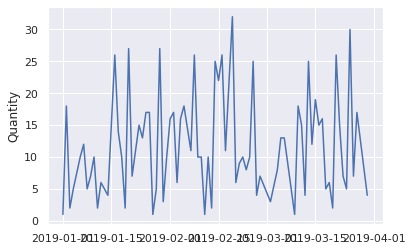

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x, y)
plt.show()

In [61]:
# mencari korelasi feature
df.corr(method="pearson")

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000
